In [2]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=258d2bdc2aee08a13a9b93413e18f40b1b302b07bbdbfb6b19eeb6a7e4a22c03
  Stored in directory: /Users/siddarthsurana/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
#import pycaret
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#from xgboost import XGBClassifier
# EDA Libraries
import sweetviz as sv
from pandas_profiling import ProfileReport
import pandas_profiling

In [2]:
# Reads project's classes
from Lib.importer import Importer
from Lib.preprocessor import Preprocessor
from Lib.analyser import Analyser
from Lib.utils import Performance

In [3]:
raw_dat = pd.read_csv("cup98LRN.csv",na_values=" ")
raw_dat.head()

/var/folders/hk/c3ljsq9n70lf63r6q9w50xtm0000gq/T/ipykernel_77983/3740102396.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_dat = pd.read_csv("cup98LRN.csv",na_values=" ")


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,

In [4]:
raw_dat.shape

(95412, 481)

Doing superficial EDA using predefined libraries to get an idea about the Dataset before moving to model building

- **Pandas Profiling**

In [5]:

#EDA using pandas-profiling
profile = ProfileReport(raw_dat, minimal=True,
                         correlations={
                                "auto": {"calculate": False},
                                "pearson": {"calculate": False},
                                "spearman": {"calculate": False},
                                "kendall": {"calculate": False},
                                "phi_k": {"calculate": False},
                                "cramers": {"calculate": False},
                                        })
#Saving results to a HTML file
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Deleting the columns which have constant value
rejected = profile.get_rejected_variables()
rejected

{'ADATE_15',
 'ADATE_5',
 'BIBLE',
 'BOATS',
 'CARDS',
 'CATLG',
 'CDPLAY',
 'COLLECT1',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'HOMEE',
 'KIDSTUFF',
 'MAILCODE',
 'MAJOR',
 'NOEXCH',
 'PCOWNERS',
 'PEPSTRFL',
 'PETS',
 'PHOTO',
 'PLATES',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'RFA_2R',
 'STEREO',
 'VETERANS',
 'WALKER'}

In [7]:
raw_dat.drop(columns=rejected,inplace=True,axis=1)

In [8]:
# Gets some redundant variables based on variance, sparsity & common sense
redundant_vars = Analyser.get_redundant_vars(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(redundant_vars, axis = 1)
print("columns deleted are ",redundant_vars)

/Users/siddarthsurana/Documents/Purvi/assignment data/Lib/analyser.py:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dat_var = dat.var()


columns deleted are  ['CONTROLN', 'ZIP', 'ADATE_2', 'ADATE_3', 'ADATE_20', 'SOLP3', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6']


In [9]:
raw_dat.shape

(95412, 438)

In [10]:
# Gets columns which have high nan values and drop them
nan_cols = Analyser.get_nan_cols(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(nan_cols, axis = 1)
print("columns deleted are ",nan_cols)

columns deleted are  ['PVASTATE', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'NUMCHLD', 'SOLIH', 'GEOCODE', 'RFA_15', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [11]:
# Gets categorical columns which have high cardinality values and drop them
cardinality_vars = Analyser.get_high_cardinality_vars(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(cardinality_vars, axis = 1)
print("columns deleted are ",cardinality_vars)

columns deleted are  ['OSOURCE', 'RFA_3', 'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10', 'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_16', 'RFA_17', 'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [27]:
# Imputes the data and fills in the missing values
raw_dat = Preprocessor.fill_nans(raw_dat)

In [28]:
df=pd.get_dummies(raw_dat)

In [29]:
df.shape

(95412, 546)

In [30]:
df.head()

,ODATEDW,TCODE,DOB,CLUSTER,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,LIFESRC,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,...,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MDMAUD_C1CM,MDMAUD_C1LM,MDMAUD_C1MM,MDMAUD_C2CM,MDMAUD_C2LM,MDMAUD_C2MM,MDMAUD_C5CM,MDMAUD_C5MM,MDMAUD_C5TM,MDMAUD_D1CM,MDMAUD_D2CM,MDMAUD_D2MM,MDMAUD_D5CM,MDMAUD_D5MM,MDMAUD_D5TM,MDMAUD_I1CM,MDMAUD_I1LM,MDMAUD_I2CM,MDMAUD_I2MM,MDMAUD_I5CM,MDMAUD_I5MM,MDMAUD_L1CM,MDMAUD_L1LM,MDMAUD_L1MM,MDMAUD_L2CM,MDMAUD_L2LM,MDMAUD_L2TM,MDMAUD_XXXX,DOMAIN_C1,DOMAIN_C2,DOMAIN_C3,DOMAIN_R1,DOMAIN_R2,DOMAIN_R3,DOMAIN_S1,DOMAIN_S2,DOMAIN_S3,DOMAIN_T1,DOMAIN_T2,DOMAIN_T3,DOMAIN_U1,DOMAIN_U2,DOMAIN_U3,DOMAIN_U4,AGEFLAG_E,AGEFLAG_I,HOMEOWNR_H,HOMEOWNR_U,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,RFA_2_L1E,RFA_2_L1F,RFA_2_L1G,RFA_2_L2E,RFA_2_L2F,RFA_2_L2G,RFA_2_L3D,RFA_2_L3E,RFA_2_L3F,RFA_2_L3G,RFA_2_L4D,RFA_2_L4E,RFA_2_L4F,RFA_2_L4G,RFA_5_A1F,RFA_5_A1G,RFA_5_A2E,RFA_5_A2F,RFA_5_A2G,RFA_5_A3D,RFA_5_A3E,RFA_5_A3F,RFA_5_A3G,RFA_5_A4D,RFA_5_A4E,RFA_5_A4F,RFA_5_A4G,RFA_5_L1G,RFA_5_L2G,RFA_5_L3F,RFA_5_L3G,RFA_5_L4F,RFA_5_L4G,RFA_5_N1G,RFA_5_N2E,RFA_5_N2F,RFA_5_N2G,RFA_5_N3E,RFA_5_N3F,RFA_5_N3G,RFA_5_N4D,RFA_5_N4E,RFA_5_N4F,RFA_5_N4G,RFA_5_S2E,RFA_5_S2F,RFA_5_S2G,RFA_5_S3E,RFA_5_S3F,RFA_5_S3G,RFA_5_S4D,RFA_5_S4E,RFA_5_S4F,RFA_5_S4G,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_C,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D
0,8901,0,3712,36.0,60.000000,3.886248,5.345699,0,0.152075,0.059166,1.116382,0.063932,0.448329,0.126322,0.065722,0.141806,0.145237,0.714484,0.237723,0.376239,0.005874,0.237558,2.491299,0,39,34,18,10,2,1,5.000000,2.038787,992,264,332,0,35,6

In [33]:
X_train=df.drop(columns=['TARGET_B','TARGET_D'])
y_train=df['TARGET_B']

In [37]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
rfe_selector = RFE(estimator=model_tree, n_features_to_select=100, step=20, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 544 features.
Fitting estimator with 524 features.
Fitting estimator with 504 features.
Fitting estimator with 484 features.
Fitting estimator with 464 features.
Fitting estimator with 444 features.
Fitting estimator with 424 features.
Fitting estimator with 404 features.
Fitting estimator with 384 features.
Fitting estimator with 364 features.
Fitting estimator with 344 features.
Fitting estimator with 324 features.
Fitting estimator with 304 features.
Fitting estimator with 284 features.
Fitting estimator with 264 features.
Fitting estimator with 244 features.
Fitting estimator with 224 features.
Fitting estimator with 204 features.
Fitting estimator with 184 features.
Fitting estimator with 164 features.
Fitting estimator with 144 features.
Fitting estimator with 124 features.
Fitting estimator with 104 features.
100 selected features


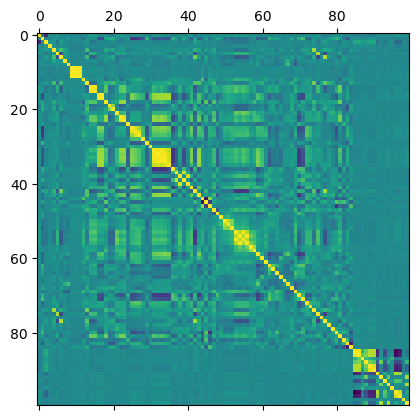

In [40]:
import matplotlib.pyplot as plt

plt.matshow(X_train[rfe_feature].corr())
plt.show()


In [42]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
rfe_selector = RFE(estimator=model_tree, n_features_to_select=40, step=20, verbose=5)
rfe_selector.fit(X_train[rfe_feature], y_train)
rfe_support = rfe_selector.get_support()
rfe_feature2 = X_train[rfe_feature].loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 100 features.
Fitting estimator with 80 features.
Fitting estimator with 60 features.
100 selected features


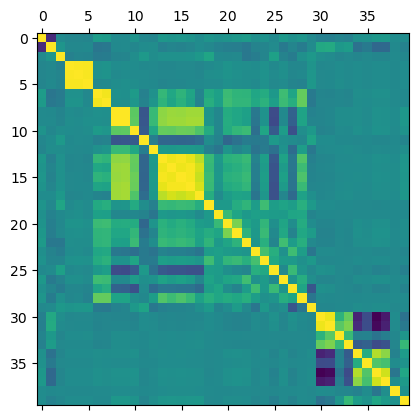

In [43]:
import matplotlib.pyplot as plt

plt.matshow(X_train[rfe_feature2].corr())
plt.show()


In [45]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
rfe_selector = RFE(estimator=model_tree, n_features_to_select=30, step=20, verbose=5)
rfe_selector.fit(X_train[rfe_feature2], y_train)
rfe_support = rfe_selector.get_support()
rfe_feature3 = X_train[rfe_feature2].loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 40 features.
100 selected features


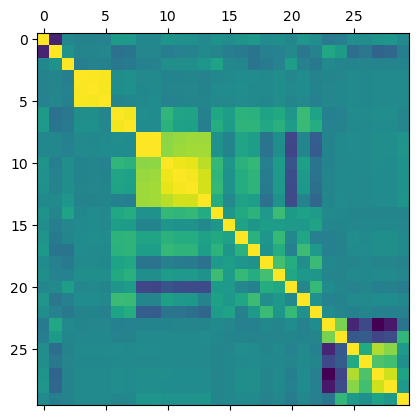

In [46]:
import matplotlib.pyplot as plt

plt.matshow(X_train[rfe_feature3].corr())
plt.show()


In [47]:
rfe_feature3

['DOB',
 'AGE',
 'MALEVET',
 'POP901',
 'POP902',
 'POP903',
 'HHP1',
 'HHP2',
 'HV1',
 'HV2',
 'IC1',
 'IC2',
 'IC4',
 'IC5',
 'TPE1',
 'PEC2',
 'TPE13',
 'LFC5',
 'EIC4',
 'OEDC5',
 'EC4',
 'VC1',
 'POBC2',
 'NUMPROM',
 'RAMNTALL',
 'MINRDATE',
 'MAXRDATE',
 'FISTDATE',
 'NEXTDATE',
 'AVGGIFT']